In [2]:
from quantities import UnitQuantity, m, nm, Hz, MHz, s, kg, eV, J, C, K, N, A

from sympy import symbols, integrate, solve, latex, oo, simplify, Function, I, lambdify
from sympy.physics.quantum import Bra, Ket, Commutator, Operator

import sympy as sp 
from IPython.display import display, Math

from numpy import linspace, exp, e, pi, sqrt, sin, vectorize
import numpy as np

from plotly.express import scatter
from pandas import DataFrame

def Units(x, units):
    x.units = units
    return x

def split_off_units(x, decimal_places = None):
    if decimal_places is not None:
        x = round(x, decimal_places)
    x = str(x)
    return f'{x.split()[0]} \\text{{{x.split()[1]} }}'

epsilon0 = 8.854187817 * 10**(-12) * C**2/(N*m**2)
mu0 = 4*pi*10**(-7) * N/(A**2)
c = 1/(mu0*epsilon0)**0.5

# 1.

Show that the commutator relation $\left[\vec{r},{\vec{p}}^2\right]=2i\hbar\vec{p}$ holds true. (434: 10 pts, 591: 6 pts)

In [4]:
hbar = symbols('hbar', real = True, positive = True, constant = True)
r = symbols('r', real = True)
r_sym = symbols('r', commutative = False)
psi = Function('\psi')(r)

def p(psi):
    return -I*hbar*psi.diff(r)


commutator = (r * p(p(psi)) - p(p(r*psi))).expand()

display(Math(f'\\left[\\vec{{r}},{{ \\vec{{p}} }}^2 \\right] = {latex(commutator)} =' 
             '2i\\hbar\\cdot-i\hbar \\frac{{d}}{{dr}} \\psi(r) = 2i\hbar p(\psi)'))

<IPython.core.display.Math object>

# 2.

Like what we have done for the Harmonic Oscillator, we can define a ladder operator for the angular momentum: $L_\pm=L_x\pm\ iL_y$. The benefit of such a ladder operator is that we can generate the higher (and lower) order wave functions by applying the respective ladder operator. The ladder operators for the angular momentum change the value of the quantum number m of the Spherical Harmonics $Y_l^m$ by one unit:

$$L_\pm Y_l^m=\hbar\sqrt{l\left(l+1\right)-m(m\pm1)}\ Y_l^{m\pm1}$$ 

Using the equations for the Spherical Harmonic function for $Y_1^0$, show that the ladder operators reproduce the Spherical Harmonic functions for $Y_1^{-1}$ and $Y_1^1$, respectively. 


Caution, this is a very lengthy problem. If you use external sources to help you out, please cite them.

You can have a look at the Wikipedia page for the Spherical Harmonics: https://en.wikipedia.org/wiki/Spherical_harmonics 

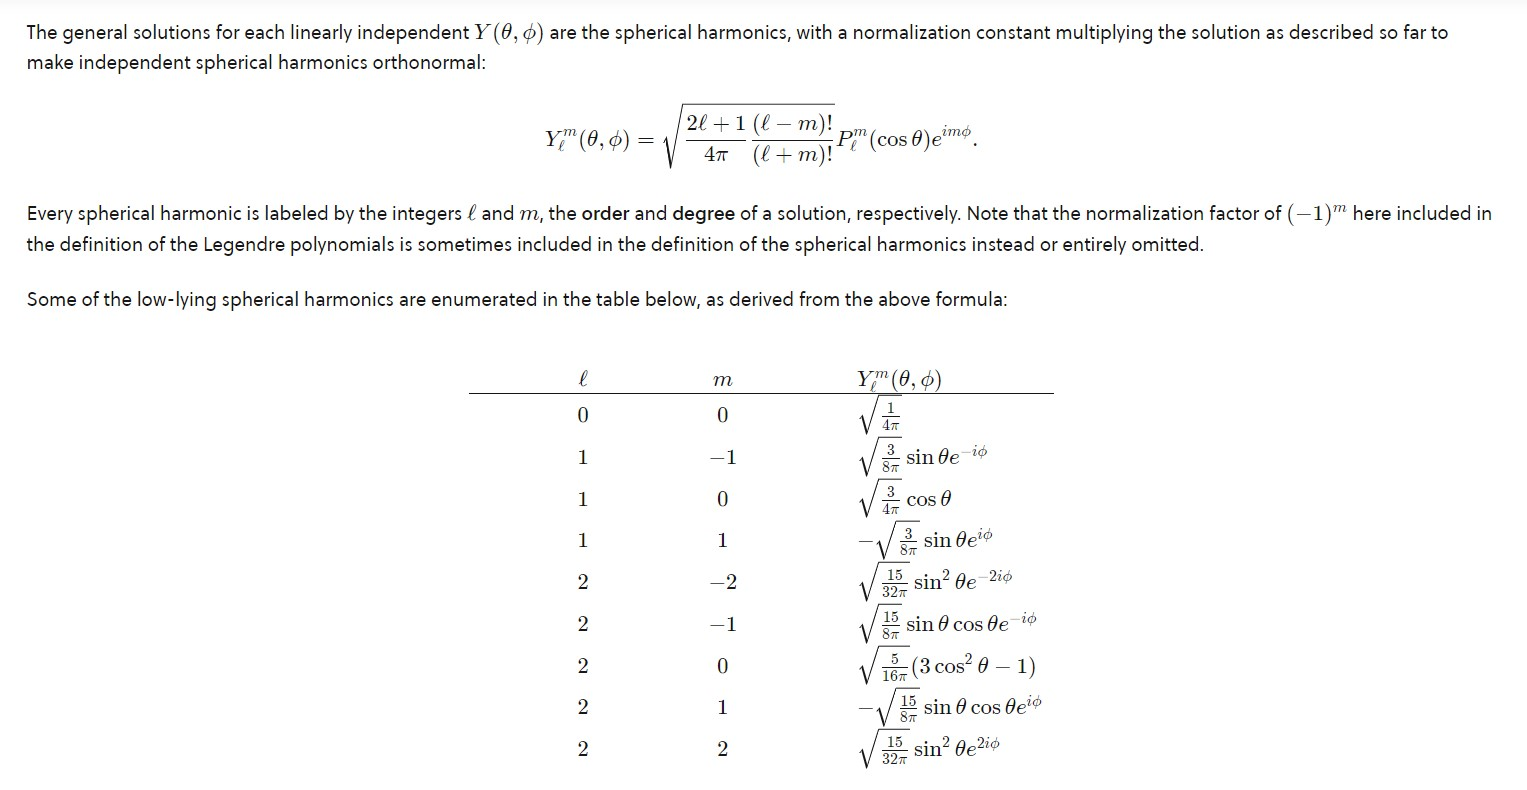

Source: [brilliant.org - Spherical Harmonics](https://brilliant.org/wiki/spherical-harmonics/#:~:text=Spherical%20harmonics%20are%20a%20set%20of%20functions%20used,variable%20%28%28functions%20on%20the%20circle%20S%5E1%29.%20S%201%29.) 

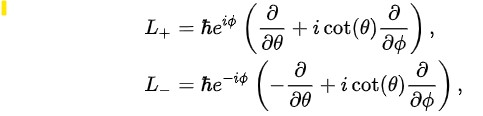

Source: https://en.wikipedia.org/wiki/Angular_momentum_operator#Orbital_angular_momentum_in_spherical_coordinates

In [23]:
phi, theta = symbols('\phi theta', real = True)

def L_plus(psi):
    l = 1; m = 1
    prefactor = 1/(hbar*sp.sqrt(l*(l+1) - m*(m - 1)))
    return hbar*sp.exp(I*phi)*(psi.diff(theta) + I*sp.cot(theta)*psi.diff(phi)) * prefactor

def L_minus(psi): 
    l = 1; m = -1
    prefactor = 1/(hbar*sp.sqrt(l*(l+1) - m*(m + 1)))
    return hbar*sp.exp(-I*phi)*(-psi.diff(theta) + I*sp.cot(theta)*psi.diff(phi)) * prefactor

Y_0 = sp.sqrt(3/(4*sp.pi))*sp.cos(theta)

display(Math(f'Y_1^{{1}} = {latex(L_plus(Y_0))}'))
display(Math(f'Y_1^{{-1}} = {latex(L_minus(Y_0))}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 3.

Determine the wavelengths of the three lowest Lyman and Balmer transitions of the Hydrogen atom. (434: 10 pts, 591: 6 pts)

Hint: These series are important in Astronomy and in Optical Spectroscopy, since a lot of UV-VIS spectrometers use Deuterium arc lamps.

Answer from answer sheet:

Lyman $_{2 \rightarrow 1} : λ = 121.6$ nm.


Solving for $\lambda$ in Bohr's formula for spectral lines gives:

$$
\lambda = \frac{p^2 n^2}{n^2-p^2}\frac{1}{R}
$$

# 4.

How large is the energy shift of the $l=1$ energy level of a Hydrogen atom in an external magnetic field of $B = 0.3\text{T}$, assuming that there is only an interaction with the angular magnetic moment? (434: 10 pts, 591: 6 pts)

Answer from answer sheet:

$E_{\text{shift}} = 9.27\cdot 10^{−24} \text{J} \cdot \text{B} = 5.79\cdot10^{−5} \text{eV} \cdot \text{B}  = 2.78\cdot10^{-24} \text{J} = 1.74\cdot10^{−5} \text{eV}$


In [63]:
from sympy import symbols, integrate, solve, latex, oo, simplify, Function, I
from sympy.physics.quantum import Bra, Ket, Commutator, Operator

hbar = symbols('hbar', real = True, positive = True, constant = True)
x = symbols('x', real = True)
r = Operator('r')
r_sym = symbols('r', commutative = False)
p = Operator('p')
psi = Function('\psi')(r)

def p_operator(f):
    return -I*hbar*(Derivative(f, r))

def r_operator(f):
    return r*f

p.apply_operator = p_operator
r.apply_operator = r_operator


(Commutator(r.apply_operator(psi), (p.apply_operator(psi))**2).doit())